## 기초 통계 검정 방법론
- 모수 통계
(가정 1 가정 2 가정 3을 만족
- 비모수 통계

# 모수 통계 vs 베이지안 통계
- 모수 통계 : 평균에 기반한 통계 검정
- 베이지안 통계 : 확률에 기반한 통계 검정

## T-test : Z-test
- 평균의 비교
- Z-test 영어  :  실무에서는 쓸모업는..?
- 전제 조건 : 모집단의 평균과 표준편차를 알아야 함

- 가설 검정:
+ 귀무가설 : 표본 평균이 모집단의 평균과 같음 (이미 모집단의 평균을 아는데..?)
+ 대립가설 : 표본평균이 모집단의 평균과 같지 않음

- 왜 이걸 검정하는가 ?
+ 추출된 표본이 동일 모집단에 실제로 속하는지 가설 검증


## 예제
- 모집단의 평균과 표준편차를 알고 있음
_ 평균 : 67.5
- 표준 편차 : 9.5


In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/zeppo.csv")
df.head()

,grades
0,50
1,60
2,60
3,64
4,66


In [2]:
df['grades'].min(), df['grades'].max()

(50, 89)

## 시각화
- 평균이 67.5 / 표준편차가 9.5인 그래프 작성

- 모집단의 수는 100개

- 히스토그램이 의미하는 것은 20개의 샘플을 추출함(df가 걍 20..)

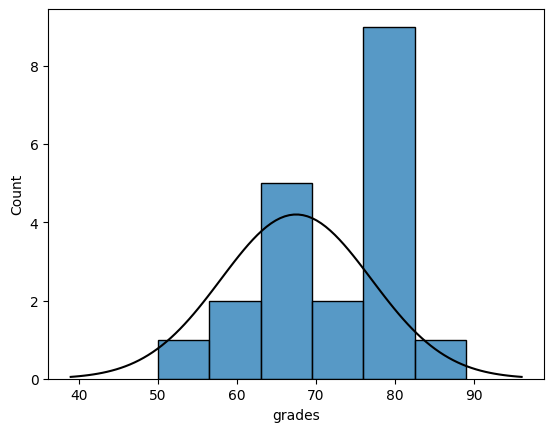

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

mu = 67.5
sigma = 9.5

x= np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
y = 100 * stats.norm.pdf(x, mu, sigma)

fig, ax = plt.subplots()
ax1 = sns.histplot(df['grades'])
ax2 = sns.lineplot(x=x, y=y, color='black')
plt.show()

사) 그래서 정규분포가 대체 뭐지? 왜 그래프랑 저렇게 다른걸까

## 가설 세우기

H0 : 표본 샘플의 평균이 67.5이다   
H1 : 표본 샘플의 평균이 67.5가 아니다

In [4]:
import statistics
statistics.mean(df['grades'])

72.3

- 모집단 평균 67.5
- 표본 평균 72.3

? 모집단의 평균과 표본 평균은 다르다고 볼 수 있을까?   
? 우연히 샘플링 에러인 건 아닌가?   
? 통계 검정이 필요하다!

#### 통계분석
- 돌다리도 두드려보고 건너자   
우연일수도 있으니까?

z 통계량  
- 각 데이터 값이 평균으로 부터 얼마나 떨어져 있는지를 나타내는 통계량
  - 표준화된 수치

In [5]:
grades = df['grades'] # 모평균? 샘플?
sample_mean = statistics.mean(grades)
print(sample_mean) # 표본의 평균값
sd_true = 9.5 # 모집단 = 표본의 표준편차
mu_null = 67.5 # 모집단의 평균값
N = len(grades) # 표본의 크기

72.3


In [6]:
# 표준 오차
import math
sem_true = sd_true / math.sqrt(N)
sem_true

2.1242645786248002

In [7]:
# Z score(Z 통계량)
z_score = (sample_mean - mu_null) / sem_true
z_score

2.259605535157681

normal dist().cdf(-z score)
+ normal dist() : 평균이 0이고 표편이 1인 정규분포 객체 생성
+ cdf() : 확률변수X가 주어진 값보다 작거나 같을 확률값을 알려줌   
주어진 값에서 정규분포의 누적 분포함수를 계산할 때 사용

In [8]:
from statistics import NormalDist
lower_area = NormalDist().cdf(-z_score)
upper_area = lower_area
p_value = lower_area + upper_area
p_value

0.023845743764939864

## 결론
- p밸류가 0.02이고 z스코어가 2.22이기 때문에, 귀무가설을 기각한다.
  - 대립가설 : 표본샘플의 평균은 67.5가 아니다.

## 응용?
- 감자칩 과자, 총 150g이라고 하면 . . . 모평균이 150이라고?
표본들을 까보고 검정하기

## One Sample T-Test
- z-test vs t-test의 가장 큰 차이

  - z-test : 모집단의 표준편차를 안다.
  - t-test : 모집단의 표준편차를 모른다.  
    
- 이것이 의미하는 것은 무엇인가?
  - 여러번 샘플링을 통해 모집단의 표편을 추정(Estimation)
  - 수동으로 여러 번 테스트 할 수 없음 (-> 데이터 수집 비용이 증가, 부트스트랩 샘플링) -> 모집단의 표편을 추정하기 위해


### 데이터 불러오기

In [9]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/zeppo.csv")
df.head()

,grades
0,50
1,60
2,60
3,64
4,66


In [10]:
import statistics
print("표본 평균 : ", statistics.mean(df['grades']))
print("표본 표편 : ", statistics.stdev(df['grades']))

표본 평균 :  72.3
표본 표편 :  9.520614752375915


### 가설설정
- 귀무가설 : 모집단 평균 월급은 3억이다.
- 대립가설 : 모집단 평균 월급은 3억이 아니다.
- one-sample t 테스트를 통해 실제로 모집단 평균을 추정

### 추정
- 전체 모수에서 일부 샘플의 평균을 구함. 전체 모수를 추정하는 건 어떻게 가능하지?
- 만약 모수가 3만 명일 때, 표본의 개수를 늘리면 좀 더 정확해지지 않을까?

ex ) 마케팅 캠페인  
화장품 - 전 여성  
10대/ 20/ 30/40/50  
근데 한 연령대만 30미만임 정규성 검정? 한 연령대만 실시

## 테스트  
- 전제조건  
전국 고등학교 평균 국어 점수 67.5  
우리 고등학교 평균 국어 점수 72.3  

- 가설설정
  - 귀무가설 : 전국 고등학생 평균 국어점수와 우리 고등학교 평균 국어점수는 "통계적으로 유의하게" 같다.
  - 대립가설 : 전국 고등학생 평균 국어점수와 우리 고등학교 평균 국어점수는 "통계적으로 유의하게" 같지 않다.

### t 통계량 , p-value 값 구하기

In [11]:
from scipy.stats import ttest_1samp
t_statistic, p_value = ttest_1samp(a = df['grades'], popmean=67.5)
t_statistic, p_value

(2.25471286700693, 0.03614521878144544)

### 신뢰구간 구하기

- 우리 고등학교의 학생 수가 1000명 / 전국 고등학교 학생 수는 40만명일때
- 샘플의 평균은 72.3  , 다르게 샘플을 뽑으면 70도 나올 수 있고~ 75도 나올 수 있고~
  - 비교 1 : 67.5 대 70 => p 밸류가 예컨대 0.045
  - 비교 2 : 67.5 대 75 => p 밸류가 예컨대 0.01 . . . 반복

In [12]:
from scipy import stats
cofidence_level = 0.95 # 신뢰도
degrees_freedom = len(df['grades']) -1   #sample을 활용하는 모든 통계기법의 자유도 공식 =  N-1
sample_mean = statistics.mean(df['grades'])
sample_standard_error = stats.sem(df['grades'])     # 표준오차
confidence_interval = stats.t.interval(cofidence_level, degrees_freedom, sample_mean, sample_standard_error)
confidence_interval

(67.84421513791415, 76.75578486208585)

-평균 72.3 을 기록한 우리 고등학교 학생들의 평균 점수는, 전국 고등학교 평균 국어 점수 67.5과 통계적으로 유의하게 다르다   
$t(19) = 2.25, p<.05, CI_{95} = [67.8, 76.8]$

티 통계량 2.25 나왔고 피밸류 0.05 이하이고, 신뢰도 95수준에서 신뢰구간은 67.8 76.8 이다

### pingouin Test
- 프로젝트 할 때 매우 유용할 것
- 빅분기 실기에는 적용이 불가함.
- https://pingouin-stats.org/build/html/guidelines.html

In [13]:
!pip install --upgrade pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=d7cd93635a1df3908f05a0c74ad8d6a80a7392979f9230f9d8b418f95122f989
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [14]:
from pingouin import ttest
result = ttest(df['grades'], 67.5)
print(result, type(result))


               T  dof alternative     p-val           CI95%   cohen-d   BF10  \
T-test  2.254713   19   two-sided  0.036145  [67.84, 76.76]  0.504169  1.795   

           power  
T-test  0.571446   <class 'pandas.core.frame.DataFrame'>


### One Sample t-test의 가정
- 정규성(Normality)을 가정
+ 데이터의 개수가 30이하면 shapiro.wilk 검정 실시
  - 정규성을 만족하지 못하면, 비모수 검정 실시 또는 데이터 개수 추가를 위한 추가 수집
  - 데이터 개수가 30이상이면 중심극한정리에 의해 정규성을 만족한다고 가정하고 검정 실시